# Deep Learning with PyTorch: A 60 Minute Blitz

http://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py

In [3]:
import torch

In [4]:
x = torch.Tensor(5, 3)
x


 0.0000e+00  8.5899e+09  0.0000e+00
 8.5899e+09  1.4013e-44  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  8.5899e+09  0.0000e+00
[torch.FloatTensor of size 5x3]

In [5]:
x = torch.rand(5, 3)
x


 0.6994  0.6041  0.4738
 0.8671  0.7180  0.3464
 0.6024  0.2129  0.1097
 0.4324  0.6699  0.6741
 0.0480  0.4713  0.9038
[torch.FloatTensor of size 5x3]

In [6]:
x.size()

torch.Size([5, 3])

In [7]:
y = torch.rand(5, 3)
x + y


 0.7373  1.4430  0.7447
 0.8883  1.6192  1.1962
 1.3779  0.3232  0.9988
 0.9794  1.3656  1.2975
 0.6879  0.7068  1.7242
[torch.FloatTensor of size 5x3]

In [8]:
torch.add(x, y)


 0.7373  1.4430  0.7447
 0.8883  1.6192  1.1962
 1.3779  0.3232  0.9988
 0.9794  1.3656  1.2975
 0.6879  0.7068  1.7242
[torch.FloatTensor of size 5x3]

In [9]:
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)
result


 0.7373  1.4430  0.7447
 0.8883  1.6192  1.1962
 1.3779  0.3232  0.9988
 0.9794  1.3656  1.2975
 0.6879  0.7068  1.7242
[torch.FloatTensor of size 5x3]

In [10]:
print(y)
y.add_(x)
print(y)


 0.0379  0.8389  0.2709
 0.0212  0.9013  0.8498
 0.7755  0.1103  0.8891
 0.5470  0.6957  0.6235
 0.6399  0.2354  0.8204
[torch.FloatTensor of size 5x3]


 0.7373  1.4430  0.7447
 0.8883  1.6192  1.1962
 1.3779  0.3232  0.9988
 0.9794  1.3656  1.2975
 0.6879  0.7068  1.7242
[torch.FloatTensor of size 5x3]



In [11]:
x


 0.6994  0.6041  0.4738
 0.8671  0.7180  0.3464
 0.6024  0.2129  0.1097
 0.4324  0.6699  0.6741
 0.0480  0.4713  0.9038
[torch.FloatTensor of size 5x3]

In [12]:
x[:, 1]


 0.6041
 0.7180
 0.2129
 0.6699
 0.4713
[torch.FloatTensor of size 5]

In [13]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size())
print(y.size())
print(z.size())

torch.Size([4, 4])
torch.Size([16])
torch.Size([2, 8])


In [14]:
a = torch.ones(5)
a


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]

In [15]:
b = a.numpy()
b

array([ 1.,  1.,  1.,  1.,  1.], dtype=float32)

In [16]:
a.add_(1)
print(a)
print(b)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


In [17]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



In [18]:
torch.cuda.is_available()

False

In [19]:
import torch
from torch.autograd import Variable

In [20]:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [21]:
y = x + 2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [22]:
y.grad_fn

In [23]:
x.grad_fn

In [24]:
z = y * y * 3
out = z.mean()
print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



In [25]:
out.backward()

In [26]:
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



In [27]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
    y = y * 2
print(y)

Variable containing:
 -188.9827
  680.0074
-1770.3358
[torch.FloatTensor of size 3]



In [28]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)
print(x.grad)

Variable containing:
  409.6000
 4096.0000
    0.4096
[torch.FloatTensor of size 3]



In [29]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [30]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [31]:
net = Net()
print(net)

Net(
  (conv1): Conv2d (1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


In [32]:
params = list(net.parameters())
print(len(params))

10


In [33]:
print(params[0].size())

torch.Size([6, 1, 5, 5])


In [34]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)

Variable containing:
-0.0229 -0.0464 -0.0298 -0.0303 -0.0734  0.0504 -0.0927 -0.1621 -0.0831  0.0059
[torch.FloatTensor of size 1x10]



In [35]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [44]:
output = net(input)
target = Variable(torch.arange(1, 11))
print(output.size(), target.size())
criterion = nn.MSELoss()
loss = criterion(output, target)
print(loss)

torch.Size([1, 10]) torch.Size([10])
Variable containing:
 39.1106
[torch.FloatTensor of size 1]



In [45]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

In [47]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
1.00000e-02 *
  3.2422
 -3.3070
 -8.0834
  1.3579
 -6.1989
  0.1939
[torch.FloatTensor of size 6]



In [51]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [52]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

## CIFAR10

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # [0, 1] => [-1, 1]
])

In [6]:
transform

In [7]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


In [8]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified


In [9]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

 deer   dog truck   cat


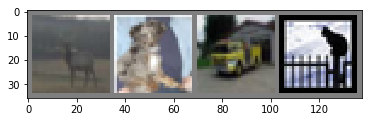

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(img):
    img = img / 2 + 0.5  # unnormalize [-1, 1] => [0, 1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # [c, h, w] => [h, w, c]

images, labels = iter(trainloader).next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [11]:
images.size()

torch.Size([4, 3, 32, 32])

- reluはFを使ったほうがよい？
- Sequentialを使った書き方

In [12]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [13]:
net

Net(
  (conv1): Conv2d (3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)

In [14]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [15]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # 2000 iterations (mini-batch) ごとにログ出力
        running_loss += loss.data[0]
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished training')

[1,  2000] loss: 2.173
[1,  4000] loss: 1.863
[1,  6000] loss: 1.671
[1,  8000] loss: 1.554
[1, 10000] loss: 1.496
[1, 12000] loss: 1.455
[2,  2000] loss: 1.355
[2,  4000] loss: 1.341
[2,  6000] loss: 1.310
[2,  8000] loss: 1.304
[2, 10000] loss: 1.255
[2, 12000] loss: 1.273
Finished training


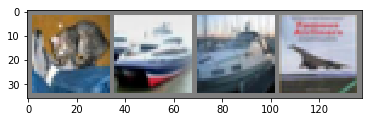

In [16]:
images, labels = iter(testloader).next()
imshow(torchvision.utils.make_grid(images))

In [17]:
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

GroundTruth:    cat  ship  ship plane


In [18]:
outputs = net(Variable(images))
outputs.size()

torch.Size([4, 10])

In [19]:
_, predicted = torch.max(outputs.data, 1)

In [20]:
predicted.size()

torch.Size([4])

In [21]:
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:   frog plane  ship plane


- 推論時にlabelsはVariableで囲まないほうがよい
- predictedはLongTensorでlabelsもLongTensorになる

In [22]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    # 推論時はlabelsはVariableで囲まない
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
#     print(type(predicted), type(labels))
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


In [30]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()  # 正解だと1、誤りだと0が入っている
    for i in range(4):
        label = labels[i]  # 正解ラベル
        class_correct[label] += c[i]
        class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 70 %
Accuracy of   car : 76 %
Accuracy of  bird : 29 %
Accuracy of   cat : 31 %
Accuracy of  deer : 55 %
Accuracy of   dog : 46 %
Accuracy of  frog : 74 %
Accuracy of horse : 61 %
Accuracy of  ship : 67 %
Accuracy of truck : 57 %


## GPUで動かすためには

### モデルをGPUに転送

- `net.cuda()`
- モデルの `cuda()` を呼び出してパラメータをすべてGPUに送ってCUDA tensorにする

### データをGPUに転送

- `inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())`